In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv


# Import Data & Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV,cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score,make_scorer, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler





df = pd.read_csv("../input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv")

# Exploratory Data Analysis

In [3]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
# Data looks cleans with no duplicates
df.drop_duplicates()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [7]:
df.isnull().sum().max()

0

In [8]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [9]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

<AxesSubplot:>

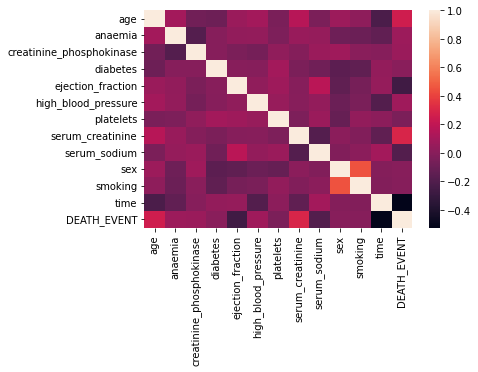

In [10]:
sns.heatmap(df.corr())

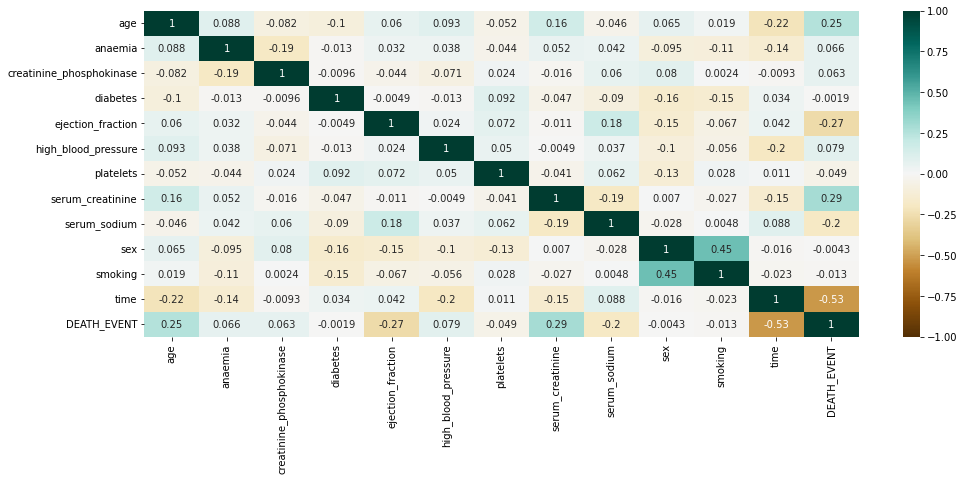

In [11]:
# Strong correlation between smoking and sex

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

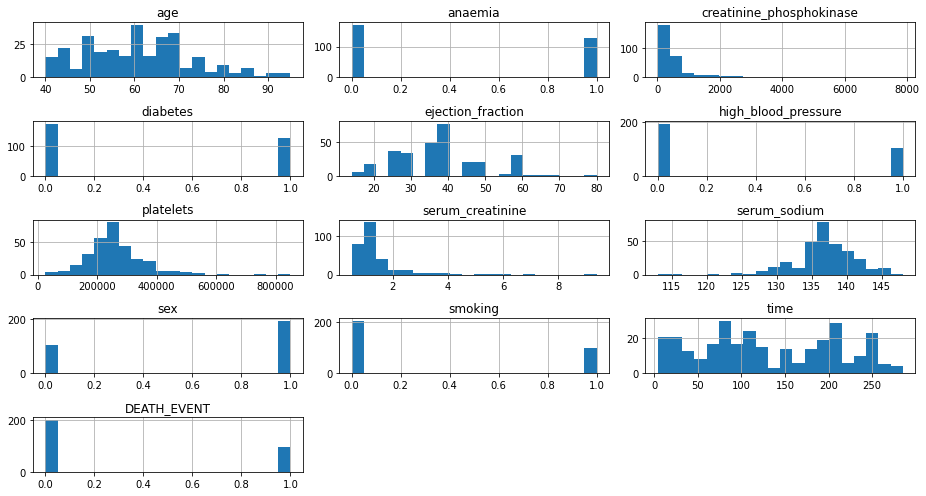

In [12]:
df.hist(figsize=(13,7),bins=20,layout=(5,3))
plt.tight_layout()
plt.show()

# Train/Test Split

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [14]:
X_train.shape

(209, 12)

In [15]:
y_train.shape

(209,)

# Prepare for ML

In [16]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
X_train_scaled.shape

(209, 12)

In [18]:
X_test_scaled.shape

(90, 12)

In [19]:
X_train_scaled

array([[0.32727273, 0.        , 0.07131921, ..., 1.        , 0.        ,
        0.71530249],
       [0.54545455, 0.        , 0.01760653, ..., 0.        , 0.        ,
        0.22064057],
       [0.03636364, 1.        , 0.00803776, ..., 1.        , 1.        ,
        0.70106762],
       ...,
       [0.27272727, 0.        , 0.09249809, ..., 1.        , 0.        ,
        0.29893238],
       [0.07272727, 0.        , 0.07131921, ..., 1.        , 1.        ,
        0.85409253],
       [0.72727273, 0.        , 0.11163562, ..., 1.        , 1.        ,
        0.29537367]])

In [20]:
X_test_scaled

array([[0.54545455, 0.        , 0.07131921, ..., 1.        , 1.        ,
        0.87544484],
       [0.18181818, 1.        , 0.03508548, ..., 1.        , 1.        ,
        0.83985765],
       [0.09090909, 0.        , 0.30862465, ..., 1.        , 0.        ,
        0.44483986],
       ...,
       [0.76363636, 1.        , 0.04541975, ..., 1.        , 0.        ,
        0.03202847],
       [0.63636364, 1.        , 0.00739985, ..., 1.        , 1.        ,
        0.02135231],
       [0.18181818, 0.        , 0.02896147, ..., 1.        , 1.        ,
        0.41281139]])

# Model Picking

In [21]:
lin_reg = LinearRegression()
svr_reg = SVR()
rf_reg = RandomForestRegressor()
br_reg = BayesianRidge()
dec_reg = DecisionTreeRegressor()

In [22]:
lin_reg.fit(X_train_scaled, y_train)

some_data = X_train_scaled[:5]
some_labels = y_train[:5]
print("Predictions:", lin_reg.predict(some_data)) 
print("Labels:", list(some_labels))

Predictions: [ 0.08935749  0.69294466 -0.07642398  0.51924333  0.62883661]
Labels: [0, 1, 0, 1, 1]


In [23]:
df_predictions = lin_reg.predict(X_train_scaled)
lin_mse = mean_squared_error(y_train, df_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.33210532338076154

In [24]:
svr_reg.fit(X_train_scaled, y_train)

df_predictions = svr_reg.predict(X_train_scaled)
lin_mse = mean_squared_error(y_train, df_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.2661048529106634

In [25]:
rf_reg.fit(X_train_scaled, y_train)

df_predictions = rf_reg.predict(X_train_scaled)
lin_mse = mean_squared_error(y_train, df_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.12896533416491404

In [26]:
br_reg.fit(X_train_scaled, y_train)

df_predictions = br_reg.predict(X_train_scaled)
lin_mse = mean_squared_error(y_train, df_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.33341895884986267

In [27]:
dec_reg.fit(X_train_scaled, y_train)

df_predictions = dec_reg.predict(X_train_scaled)
lin_mse = mean_squared_error(y_train, df_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.0

# Model Selection

In [28]:
scores = cross_val_score(rf_reg, X_train_scaled, y_train, scoring = "neg_mean_squared_error", cv=10)
rf_rmse_scores = np.sqrt(-scores)

In [29]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())

display_scores(rf_rmse_scores)

Scores: [0.41159388 0.42970089 0.2235429  0.23152702 0.27423487 0.35730473
 0.37546796 0.43674663 0.25202041 0.25609569]
Mean: 0.3248234974090862
Standard Deviation: 0.0813757030982767


In [30]:
lin_scores = cross_val_score(lin_reg, X_train_scaled, y_train, scoring = "neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.35151446 0.40561327 0.26250175 0.29775812 0.28602381 0.37523292
 0.38561022 0.45900184 0.35003863 0.33844828]
Mean: 0.3511743316564688
Standard Deviation: 0.05610622284199177


In [31]:
dec_scores = cross_val_score(dec_reg, X_train_scaled, y_train, scoring = "neg_mean_squared_error", cv=10)
dec_rmse_scores = np.sqrt(-dec_scores)
display_scores(dec_rmse_scores)

Scores: [0.6172134  0.43643578 0.         0.3086067  0.48795004 0.48795004
 0.48795004 0.53452248 0.21821789 0.2236068 ]
Mean: 0.3802453161478157
Standard Deviation: 0.17844346717159243


In [32]:
br_scores = cross_val_score(br_reg, X_train_scaled, y_train, scoring = "neg_mean_squared_error", cv=10)
br_rmse_scores = np.sqrt(-br_scores)
display_scores(br_rmse_scores)

Scores: [0.3594615  0.40329655 0.25904635 0.30761875 0.29024329 0.37366589
 0.38338321 0.44433727 0.3544447  0.33183418]
Mean: 0.35073316892490564
Standard Deviation: 0.05242905182889297


In [33]:
svr_scores = cross_val_score(svr_reg, X_train_scaled, y_train, scoring = "neg_mean_squared_error", cv=10)
svr_rmse_scores = np.sqrt(-svr_scores)
display_scores(svr_rmse_scores)

Scores: [0.43442903 0.40810288 0.27341299 0.29235157 0.35791677 0.36070467
 0.40158117 0.46097858 0.43538584 0.30260683]
Mean: 0.37274703196635445
Standard Deviation: 0.06261774886480917


# Model Tuning

In [34]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]}
]

rf_reg = RandomForestRegressor()

grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [35]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 10}

In [36]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=10)

In [37]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.4072196566408331 {'max_features': 2, 'n_estimators': 3}
0.3463950736346109 {'max_features': 2, 'n_estimators': 10}
0.31610429514596966 {'max_features': 2, 'n_estimators': 30}
0.3438901288194314 {'max_features': 4, 'n_estimators': 3}
0.32509089232006194 {'max_features': 4, 'n_estimators': 10}
0.31569925787388065 {'max_features': 4, 'n_estimators': 30}
0.4002999262699636 {'max_features': 6, 'n_estimators': 3}
0.31112922352010425 {'max_features': 6, 'n_estimators': 10}
0.3236560805623244 {'max_features': 6, 'n_estimators': 30}
0.3354366471109877 {'max_features': 8, 'n_estimators': 3}
0.32722214499005586 {'max_features': 8, 'n_estimators': 10}
0.3232994262826864 {'max_features': 8, 'n_estimators': 30}
0.36722760035959523 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.3292196806718816 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.35975429305898615 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.33344191030726955 {'bootstrap': False, 'max_features

# Pick the Best Model

In [38]:
final_model = grid_search.best_estimator_

X_test_scaled = df.drop("DEATH_EVENT", axis=1)
y_test = df["DEATH_EVENT"]

final_predictions = final_model.predict(X_test_scaled)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [39]:
final_rmse

0.47032330728757893